In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
%matplotlib inline

def get_obj(file_name):
    return pickle.load(open(os.path.join("./myres", file_name), 'rb'))

mc = get_obj('mnist-cnn.test.res')
ac = get_obj('mnist_with_awgn-cnn.test.res')
bc = get_obj('mnist_with_motion_blur-cnn.test.res')
cc = get_obj('mnist_with_reduced_contrast_and_awgn-cnn.test.res')
mr = get_obj('mnist-raw.test.res')
ar = get_obj('mnist_with_awgn-raw.test.res')
br = get_obj('mnist_with_motion_blur-raw.test.res')
cr = get_obj('mnist_with_reduced_contrast_and_awgn-raw.test.res')
m128 = get_obj('mnist-dropout_2.test.res')
a128 = get_obj('mnist_with_awgn-dropout_2.test.res')
b128 = get_obj('mnist_with_motion_blur-dropout_2.test.res')
c128 = get_obj('mnist_with_reduced_contrast_and_awgn-dropout_2.test.res')
m10 = get_obj('mnist-dense_2.test.res')
a10 = get_obj('mnist_with_awgn-dense_2.test.res')
b10 = get_obj('mnist_with_motion_blur-dense_2.test.res')
c10 = get_obj('mnist_with_reduced_contrast_and_awgn-dense_2.test.res')
m9216 = get_obj('mnist-flatten_1.test.res')
a9216 = get_obj('mnist_with_awgn-flatten_1.test.res')
b9216 = get_obj('mnist_with_motion_blur-flatten_1.test.res')
c9216 = get_obj('mnist_with_reduced_contrast_and_awgn-flatten_1.test.res')

## Table

In [2]:
print(mc["accuracy"], ac["accuracy"], bc["accuracy"], cc["accuracy"])

0.9898 0.9388 0.9185 0.7191


In [3]:
print(mr["accuracy"], ar["accuracy"], br["accuracy"], cr["accuracy"])

0.9787 0.7666 0.9573 0.6129


In [4]:
print(m128["accuracy"], a128["accuracy"], b128["accuracy"], c128["accuracy"])

0.9925 0.8985 0.9317 0.7245


In [5]:
print(m10["accuracy"], a10["accuracy"], b10["accuracy"], c10["accuracy"])

0.9909 0.9022 0.9537 0.5536


In [6]:
print(m9216["accuracy"], a9216["accuracy"], b9216["accuracy"], c9216["accuracy"])

0.9885 0.9189 0.853 0.7857


## Plot cnn < 30%

9
0
9
3
4


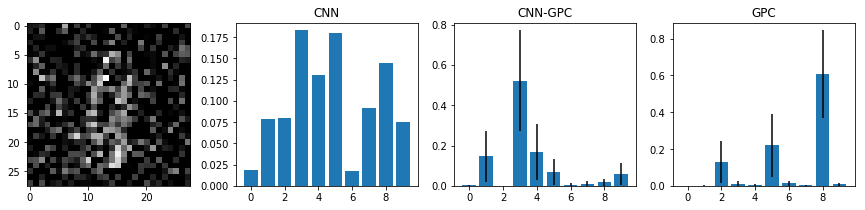

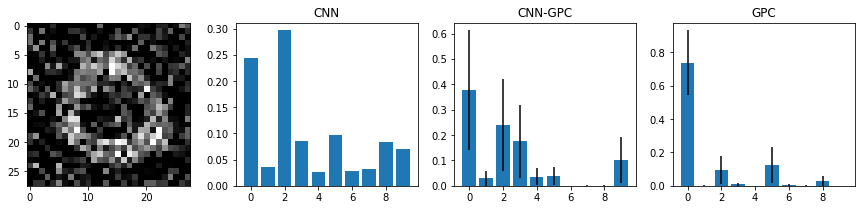

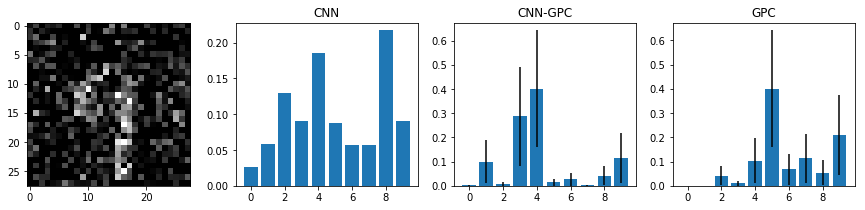

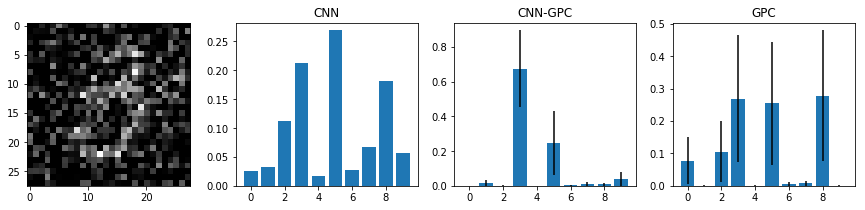

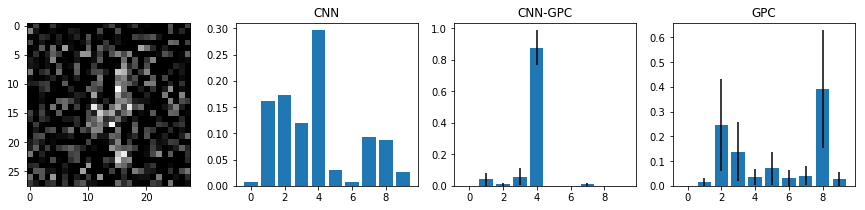

In [7]:
idxs = np.where(np.max(cc["prob"], axis = 1) < 0.3)[0]
#fig=plt.figure(dpi= 60)
#plt.imshow(cc["Xt"][idx].reshape(28,28), cmap="binary_r")
#plt.colorbar()
#print(cc["Yt"][idx])

def gen_img(idxs, LEN, filename="img"):
    for i in range(LEN):
        idx = idxs[i]
        fig = plt.figure(figsize=(15,3))
        plt.subplot(1, 4, 1)
        plt.imshow(cc["Xt"][idx].reshape(28,28), cmap="binary_r")
        plt.subplot(1, 4, 2)
        plt.bar(x=range(10), height=cc["prob"][idx], yerr=cc["var"][idx])
        plt.gca().set_title('CNN')
        plt.subplot(1, 4, 3)
        plt.bar(x=range(10), height=c128["prob"][idx], yerr=c128["var"][idx])
        plt.gca().set_title('CNN-GPC')
        plt.subplot(1, 4, 4)
        plt.bar(x=range(10), height=cr["prob"][idx], yerr=cr["var"][idx])
        plt.gca().set_title('GPC')
        fig.savefig(os.path.join('./plots/', filename + str(i) + '.eps'), format="eps", dpi=600)
        print(cc["Yt"][idx])

gen_img(idxs, 5, "cnn30")

[ 437  663  676  881 1133 2464 2552 2790 3065 3660 4081 4953 5009 5324
 5913 6735 6753 7844 7863 8033 8889 9284 9974]
1
1
1
1
6


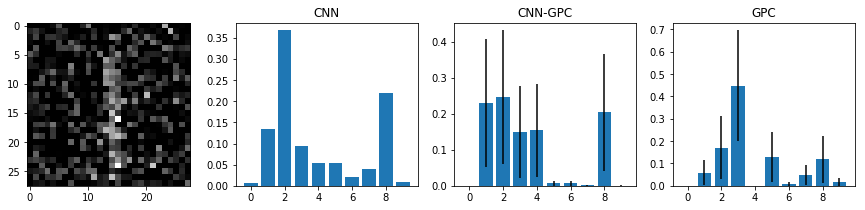

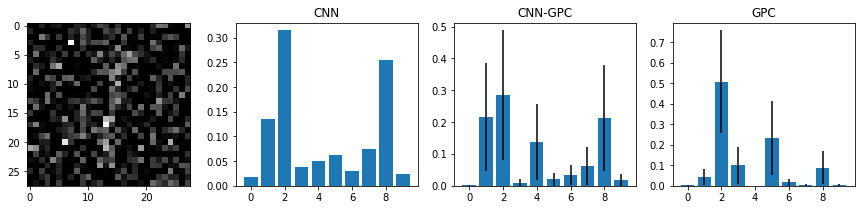

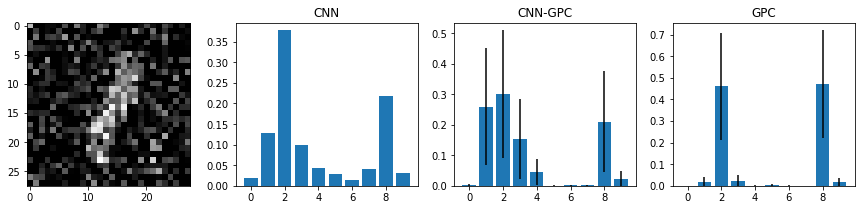

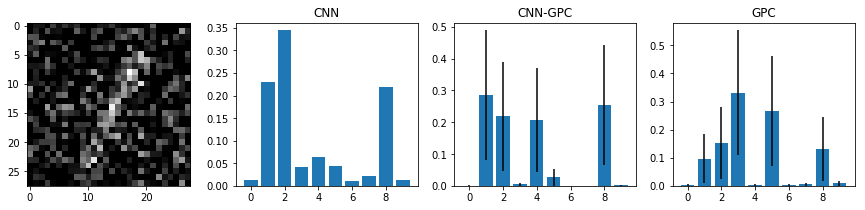

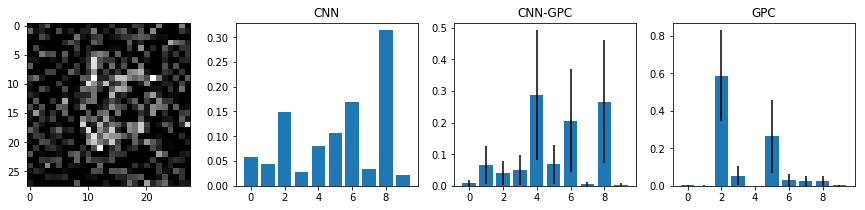

In [8]:
idxs = np.where(np.logical_and((np.max(c128["prob"], axis = 1) < 0.3) , (np.max(cc["prob"], axis = 1) > 0.3)))[0]
print(idxs)
gen_img(idxs, 5, "sp")

## CM

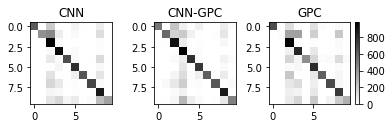

In [9]:
def confusion_matrix_gen(pred, y):
    cm = np.zeros((10, 10), dtype = "int64")
    for idx in range(len(y)):
        cm[y[idx]][pred[idx]] += 1
    return cm

np.argmax(cc["prob"], axis=1).shape
cc["Yt"].shape

cc_cm = confusion_matrix_gen(np.argmax(cc["prob"], axis=1), cc["Yt"])
c128_cm = confusion_matrix_gen(np.argmax(c128["prob"], axis=1), c128["Yt"])
cr_cm = confusion_matrix_gen(np.argmax(cr["prob"], axis=1), cr["Yt"])
#print(cc_cm)

fig = plt.figure(figsize=(6.3,1.5))
plt.subplot(1, 3, 1)
plt.imshow(cc_cm, cmap="binary")
plt.gca().set_title('CNN')
plt.subplot(1, 3, 2)
plt.imshow(c128_cm, cmap="binary")
plt.gca().set_title('CNN-GPC')
plt.subplot(1, 3, 3)
plt.imshow(cr_cm, cmap="binary")
plt.gca().set_title('GPC')
plt.colorbar()
fig.savefig(os.path.join('./plots/', 'confusion_matrix.eps'), format="eps", dpi=600)

## Hist

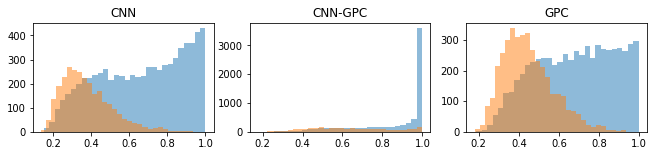

In [10]:
def max_prob(prob):
    return np.max(prob, axis=1)

def pred(prob):
    return np.argmax(prob, axis=1)

def correct(pred, y):
    return pred == y

cc_correct = correct(pred(cc["prob"]), cc["Yt"])
cc_max_prob = max_prob(cc["prob"])
cc_t_idxs = np.where(cc_correct)
cc_f_idxs = np.where(np.logical_not(cc_correct))

fig = plt.figure(figsize=(11,2))
plt.subplot(1, 3, 1)
plt.hist(cc_max_prob[cc_t_idxs], alpha=0.5, bins=30)
plt.hist(cc_max_prob[cc_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('CNN')

c128_correct = correct(pred(c128["prob"]), c128["Yt"])
c128_max_prob = max_prob(c128["prob"])
c128_max_prob_var = np.diag(c128["var"][:, np.argmax(c128["prob"], axis=1)])
c128_t_idxs = np.where(c128_correct)
c128_f_idxs = np.where(np.logical_not(c128_correct))

plt.subplot(1, 3, 2)
plt.hist(c128_max_prob[c128_t_idxs], alpha=0.5, bins=30)
plt.hist(c128_max_prob[c128_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('CNN-GPC')

cr_correct = correct(pred(cr["prob"]), cr["Yt"])
cr_max_prob = max_prob(cr["prob"])
cr_max_prob_var = np.diag(cr["var"][:, np.argmax(cr["prob"], axis=1)])
cr_t_idxs = np.where(cr_correct)
cr_f_idxs = np.where(np.logical_not(cr_correct))

plt.subplot(1, 3, 3)
plt.hist(cr_max_prob[cr_t_idxs], alpha=0.5, bins=30)
plt.hist(cr_max_prob[cr_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('GPC')

fig.savefig(os.path.join('./plots/', 'hist.eps'), format="eps", dpi=600)

Text(0.5,1,'GPC')

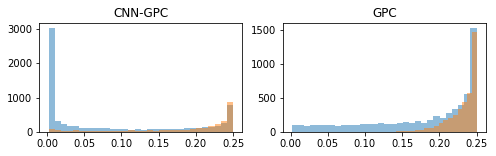

In [11]:
fig = plt.figure(figsize=(8,2))
plt.subplot(1, 2, 1)
plt.hist(c128_max_prob_var[c128_t_idxs], alpha=0.5, bins=30)
plt.hist(c128_max_prob_var[c128_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('CNN-GPC')
plt.subplot(1, 2, 2)
plt.hist(cr_max_prob_var[cr_t_idxs], alpha=0.5, bins=30)
plt.hist(cr_max_prob_var[cr_f_idxs], alpha=0.5, bins=30)
plt.gca().set_title('GPC')

## CNN-GPC pretty sure?

388
7
0
8
7
0


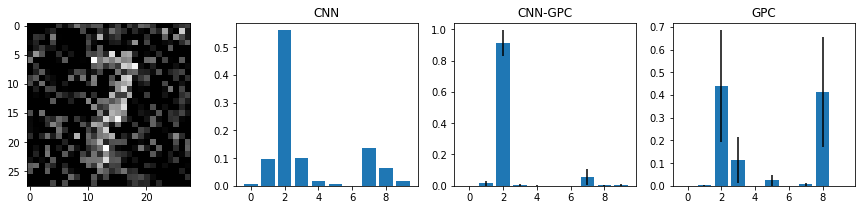

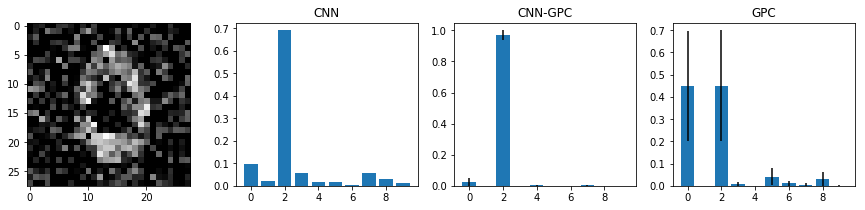

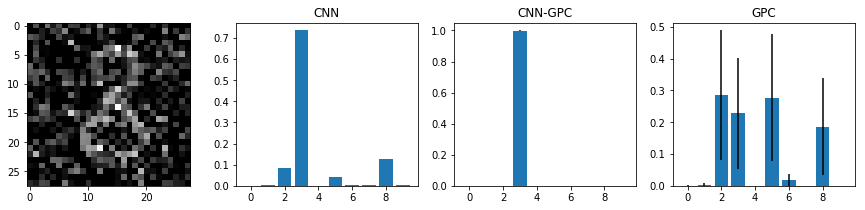

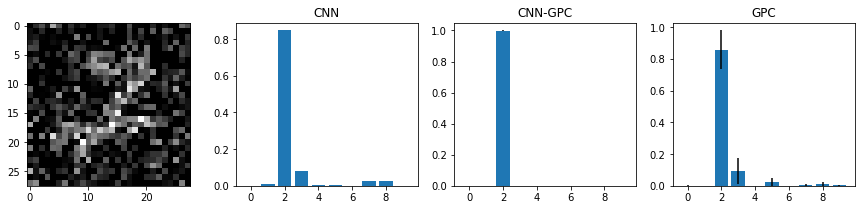

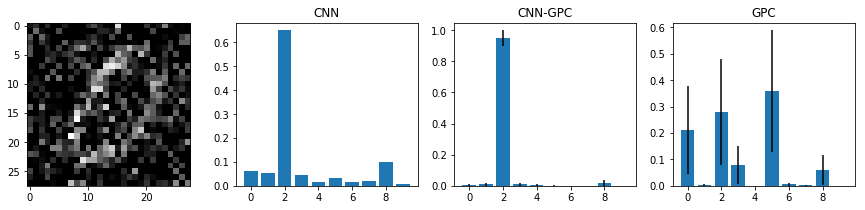

In [12]:
idxs = np.where(np.logical_and((np.max(c128["prob"], axis = 1) > 0.9) , (pred(c128["prob"]) != c128["Yt"])))[0]
print(len(idxs))
gen_img(idxs, 5, "sp")

In [13]:
plt.bar(x=range(10), height=b128["prob"][idx], yerr=b128["var"][idx])

NameError: name 'idx' is not defined